# Name: Ahmad Ossama Ahmad 

# The Sparks Foundation Data Science & Business Analytics Internship

## TASK 3 : Exploratory Data Analysis - Retail

## Goal: 
## - Try to find out the weak areas where you can work to make more profit.
## - Derive all business problems derived by exploring the data.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Reading Dataset

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

### Dataframe description

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Check sum of the null values.
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Clean and organize the data

In [8]:
# Check number of duplicate values
df.duplicated().sum() 

17

In [9]:
# Remove duplicates data
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


As shown above, the number of rows is reduced from 9994 to 9977 which represents the 17 duplicates

In [10]:
#Detecting and removing Outliers if there
print(np.where(df['Quantity']<0))

(array([], dtype=int64),)


In [11]:
print(np.where(df['Discount']<0))

(array([], dtype=int64),)


In [12]:
print(np.where(df['Postal Code'].dtype!='int64'))

(array([], dtype=int64),)


In [13]:
# Displays the unique data after removing duplicates
df.nunique() 

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Data Visualization

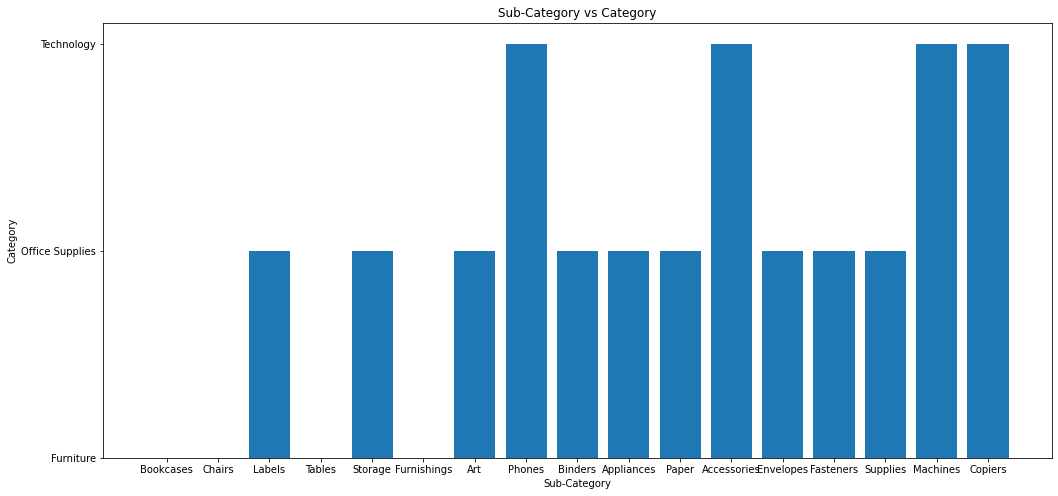

In [14]:
plt.figure(figsize = (17,8))
plt.bar('Sub-Category','Category', data = df)
plt.title('Sub-Category vs Category')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.show()

### Checking  relation between the numerical rows & columns

In [15]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [16]:
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


In [17]:
# Drop columns that will cause numerical mistakes
new_df = df.drop(columns = 'Postal Code',axis=1)
new_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [18]:
new_df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


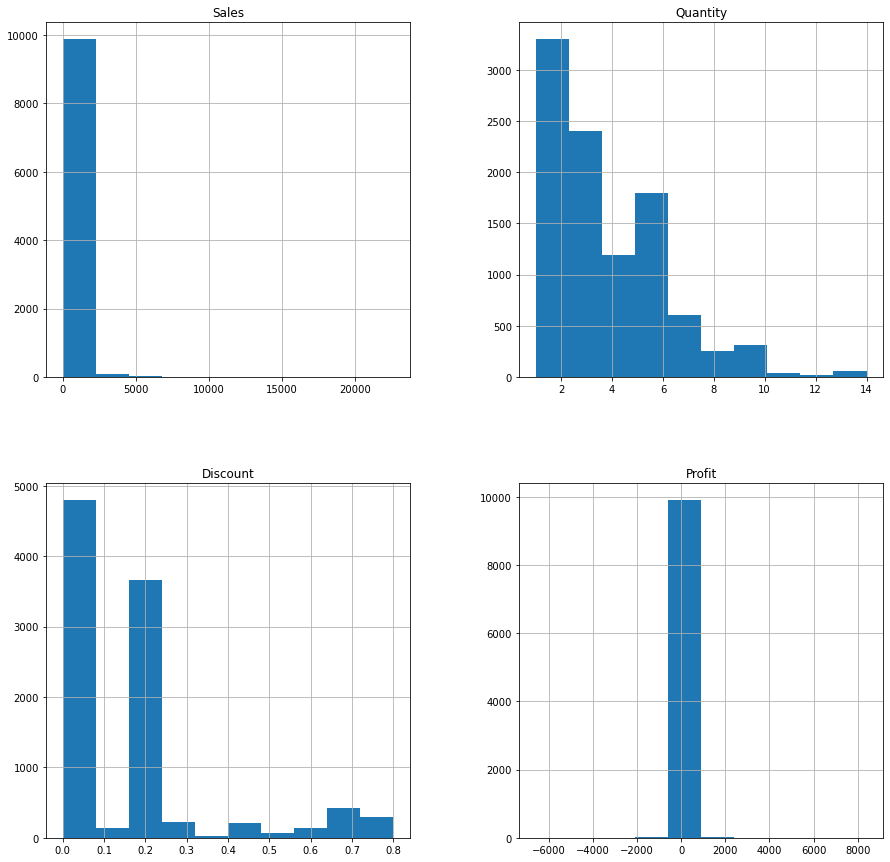

In [19]:
new_df.hist(figsize=(15,15))
plt.show();

In [20]:
# Count the no of repeatable cities
new_df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

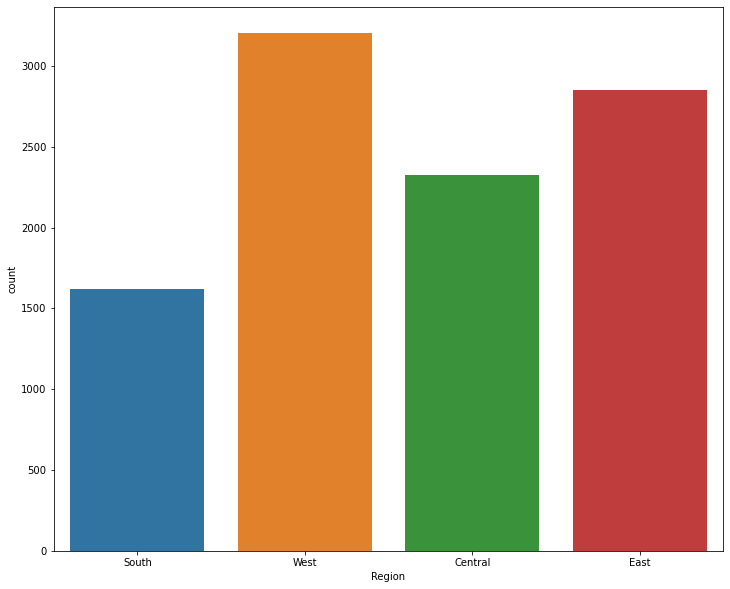

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(x = new_df['Region'])
plt.show()

From the graph shown, South region contains the least number of records

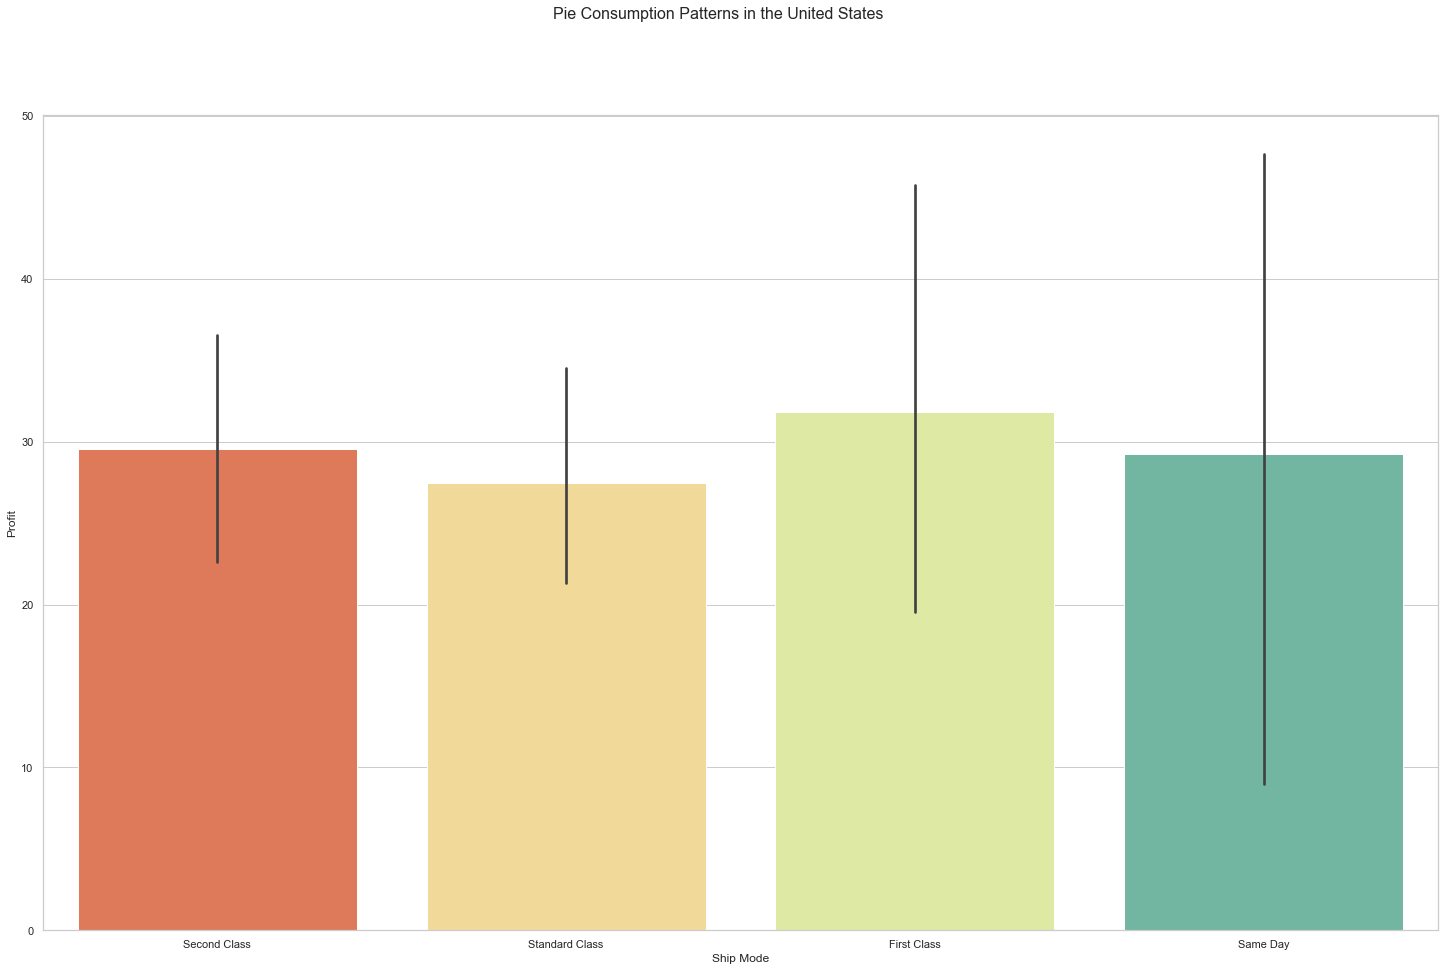

In [22]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(25,15))
sns.barplot(x='Ship Mode',y='Profit', data=new_df, palette='Spectral')
plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)
plt.show()

The data looks normal as the 4 different ship modes contain close profits

<function matplotlib.pyplot.show(close=None, block=None)>

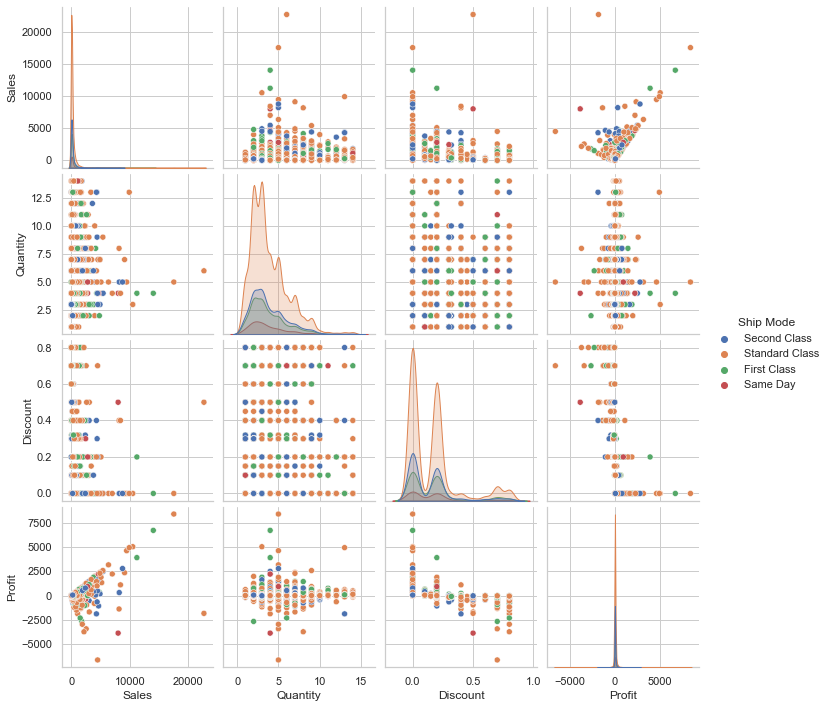

In [23]:
figsize=(15,10)
sns.pairplot(new_df,hue='Ship Mode')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

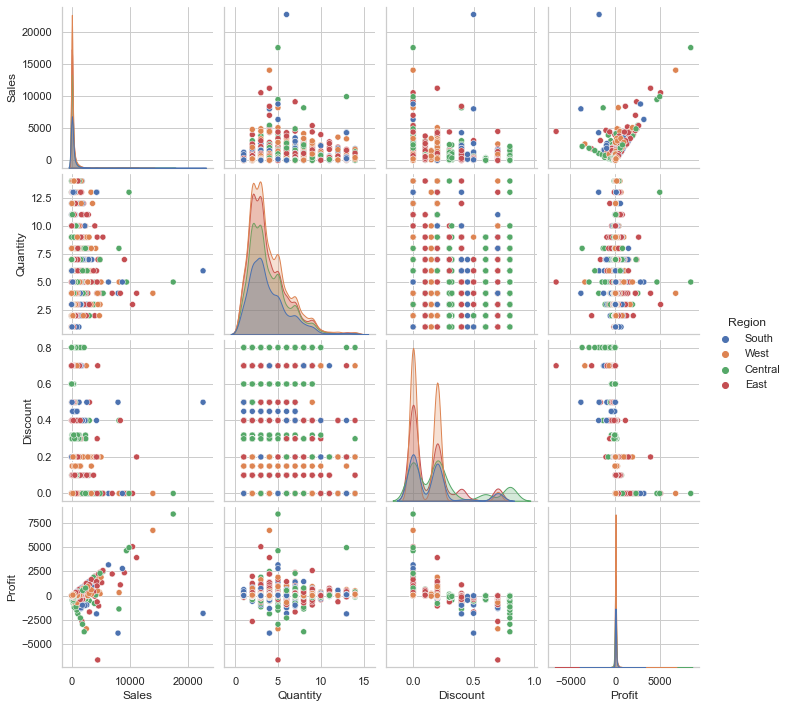

In [24]:
#Plotting statistical results of each region
figsize=(15,10)
sns.pairplot(new_df,hue='Region')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

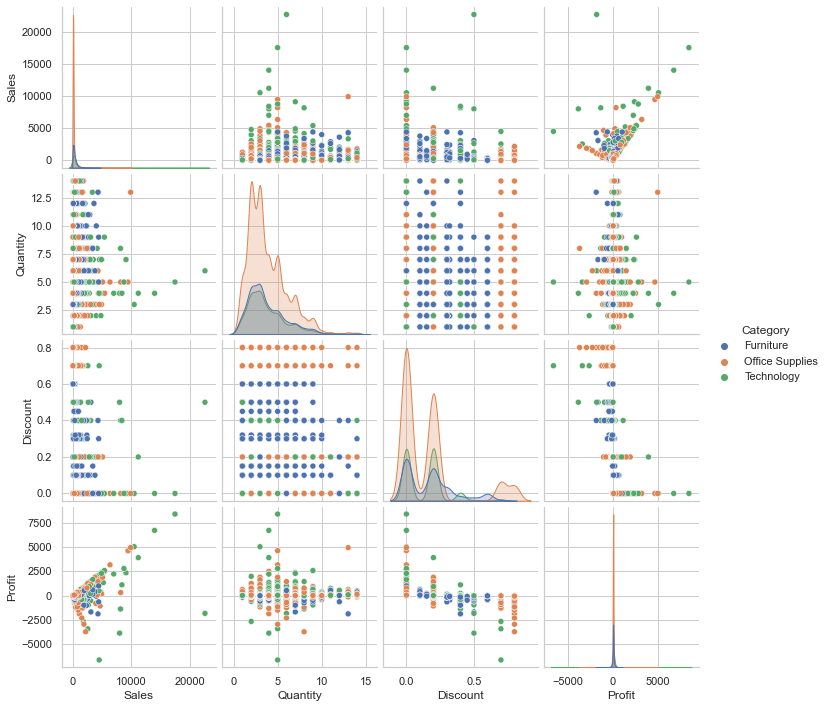

In [25]:
#Plotting statistical results of each category
figsize=(15,10)
sns.pairplot(new_df,hue='Category')
plt.show

These graphs doesnot show exactly the nature of data as all regions are printed upon each other

<function matplotlib.pyplot.show(close=None, block=None)>

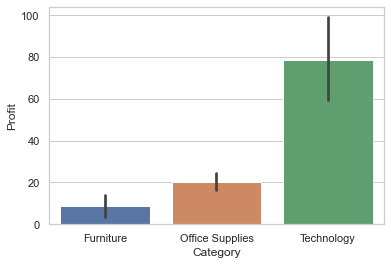

In [26]:
sns.barplot('Category','Profit',data = new_df)
plt.show 

This bar plot shows that furniture category represents the lowest profit while the highest is technology

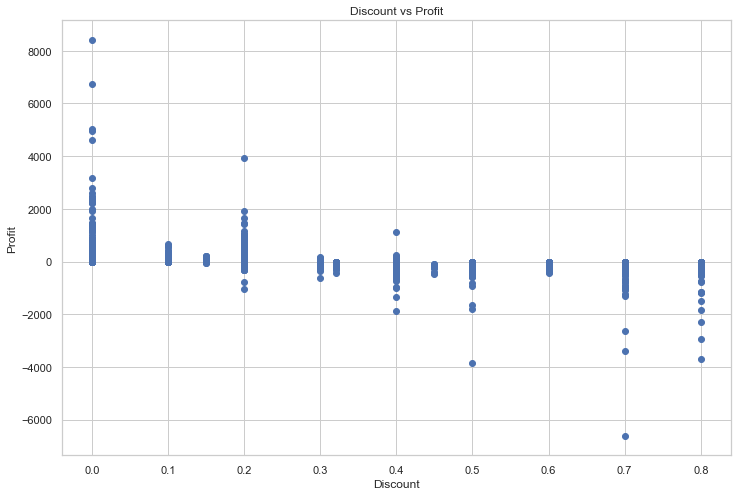

In [27]:
fig, axes = plt.subplots(figsize = (12 , 8))
axes.scatter(new_df["Discount"] , new_df["Profit"])
axes.set_xlabel('Discount')
axes.set_ylabel('Profit')
axes.set_title('Discount vs Profit')
plt.show()

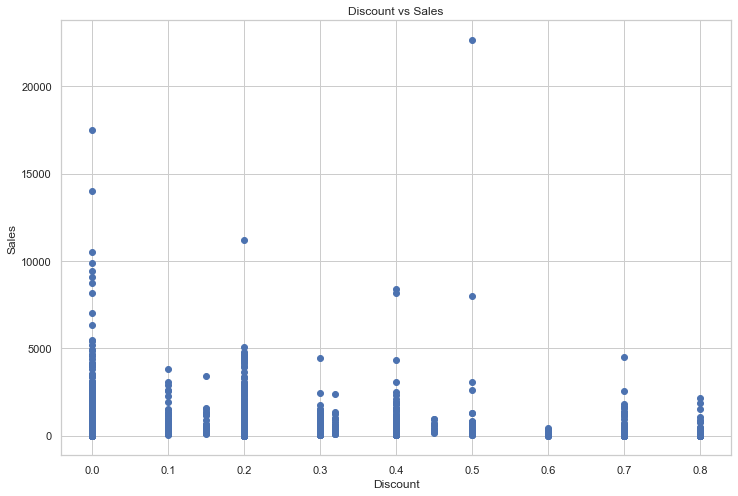

In [28]:
fig, axes = plt.subplots(figsize = (12 , 8))
axes.scatter(new_df["Discount"] , new_df["Sales"])
axes.set_xlabel('Discount')
axes.set_ylabel('Sales')
axes.set_title('Discount vs Sales')
plt.show()

### As shown from the two graphs the 0 discount produces the highest sales and profit. However, we need to increase the discount a little bit to attract more customers (0.2) for example produces the second highest profit so if sales is increased with discount profit would be much larger